In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. NC Well Metals/P1011.2. Analyses/P1011.2.3. ML Visualizations/P1011.2.3.2. Variable Importance Plots/Output')
cur_date = "092724"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

# reading in files
as_var_imp_df = data.frame(read_excel("Input/As_SVM_Variable_Importance_072624.xlsx"), Outcome = "Arsenic") 
mn_var_imp_df = data.frame(read_excel("Input/Mn_SVM_Variable_Importance_072624.xlsx"), Outcome = "Manganese") 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
head(as_var_imp_df)

,Predictor,Variable.Importance,Use.Case,Kernel,Passed_Filter,Outcome
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Longitude,0.6948171,1,svmLinear,Yes,Arsenic
2,Rock_TypeM,0.4588573,1,svmLinear,Yes,Arsenic
3,pH,0.4232026,1,svmLinear,Yes,Arsenic
4,Soil_Type_CondensedH,0.3505539,1,svmLinear,Yes,Arsenic
5,Water_Sample_Date,0.1809384,1,svmLinear,Yes,Arsenic
6,Well_Depth,0.1522653,1,svmLinear,No,Arsenic


Plotting variable importance of the top performing models from use case 1, which was SVM with a linear kernel predicting As and Mn contamination.

In [3]:
# creating 1 df
var_imp_df = rbind(as_var_imp_df, mn_var_imp_df) %>%
    # only plotting for the first use case
    filter(Use.Case == 1, Kernel == "svmLinear") %>%
    # cleaning up the predictor names
    mutate(Predictor = gsub("_", " ", Predictor),
           Predictor = gsub(" Condensed", "", Predictor), 
           Predictor = ifelse(Predictor == "LanduseF", "Land use - Forest", 
                           ifelse(Predictor == "LanduseD", "Land use - Developed", 
                                 ifelse(Predictor == "LanduseS", "Land use - Shrub/Scrub",
                                       ifelse(Predictor == "LanduseG", "Land use - Grass",
                                             ifelse(Predictor == "LanduseC", "Land use - Crop", 
                                                   ifelse(Predictor == "Soil TypeD", "Soil Type - Dystrudepts",
                                                         ifelse(Predictor == "Soil TypeH", "Soil Type - Hapludults",
                                                               ifelse(Predictor == "Soil TypeK", "Soil Type - Kanhapludults",
                                                                      ifelse(Predictor == "Soil TypeNA", "Soil Type - Other",
                                                                          ifelse(Predictor == "Rock TypeG", "Rock Type - Granite",
                                                                                 ifelse(Predictor == "Rock TypeGP", "Rock Type - Granite/Pluton",
                                                                                        ifelse(Predictor == "Rock TypeMV", "Rock Type - Metavolcanics",
                                                                                               ifelse(Predictor == "Rock TypeM", "Rock Type - Mudstone",
                                                                      Predictor))))))))))))),
           # adding a column that represents the highest ranking noise variable
           Random_Noise = ifelse(Outcome == "Arsenic", 0.1569, 0.266),
           Outcome = ifelse(Outcome == "Arsenic", "(A) Arsenic", "(B) Manganese"),
           # adding a column that indicates the directionality of the magnitude that will be plotted
           Sign = ifelse(Variable.Importance < 0, "Negative", "Positive")) 
    
    

head(var_imp_df)

,Predictor,Variable.Importance,Use.Case,Kernel,Passed_Filter,Outcome,Random_Noise,Sign
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,Longitude,0.6948171,1,svmLinear,Yes,(A) Arsenic,0.1569,Positive
2,Rock Type - Mudstone,0.4588573,1,svmLinear,Yes,(A) Arsenic,0.1569,Positive
3,pH,0.4232026,1,svmLinear,Yes,(A) Arsenic,0.1569,Positive
4,Soil Type - Hapludults,0.3505539,1,svmLinear,Yes,(A) Arsenic,0.1569,Positive
5,Water Sample Date,0.1809384,1,svmLinear,Yes,(A) Arsenic,0.1569,Positive
6,Well Depth,0.1522653,1,svmLinear,No,(A) Arsenic,0.1569,Positive


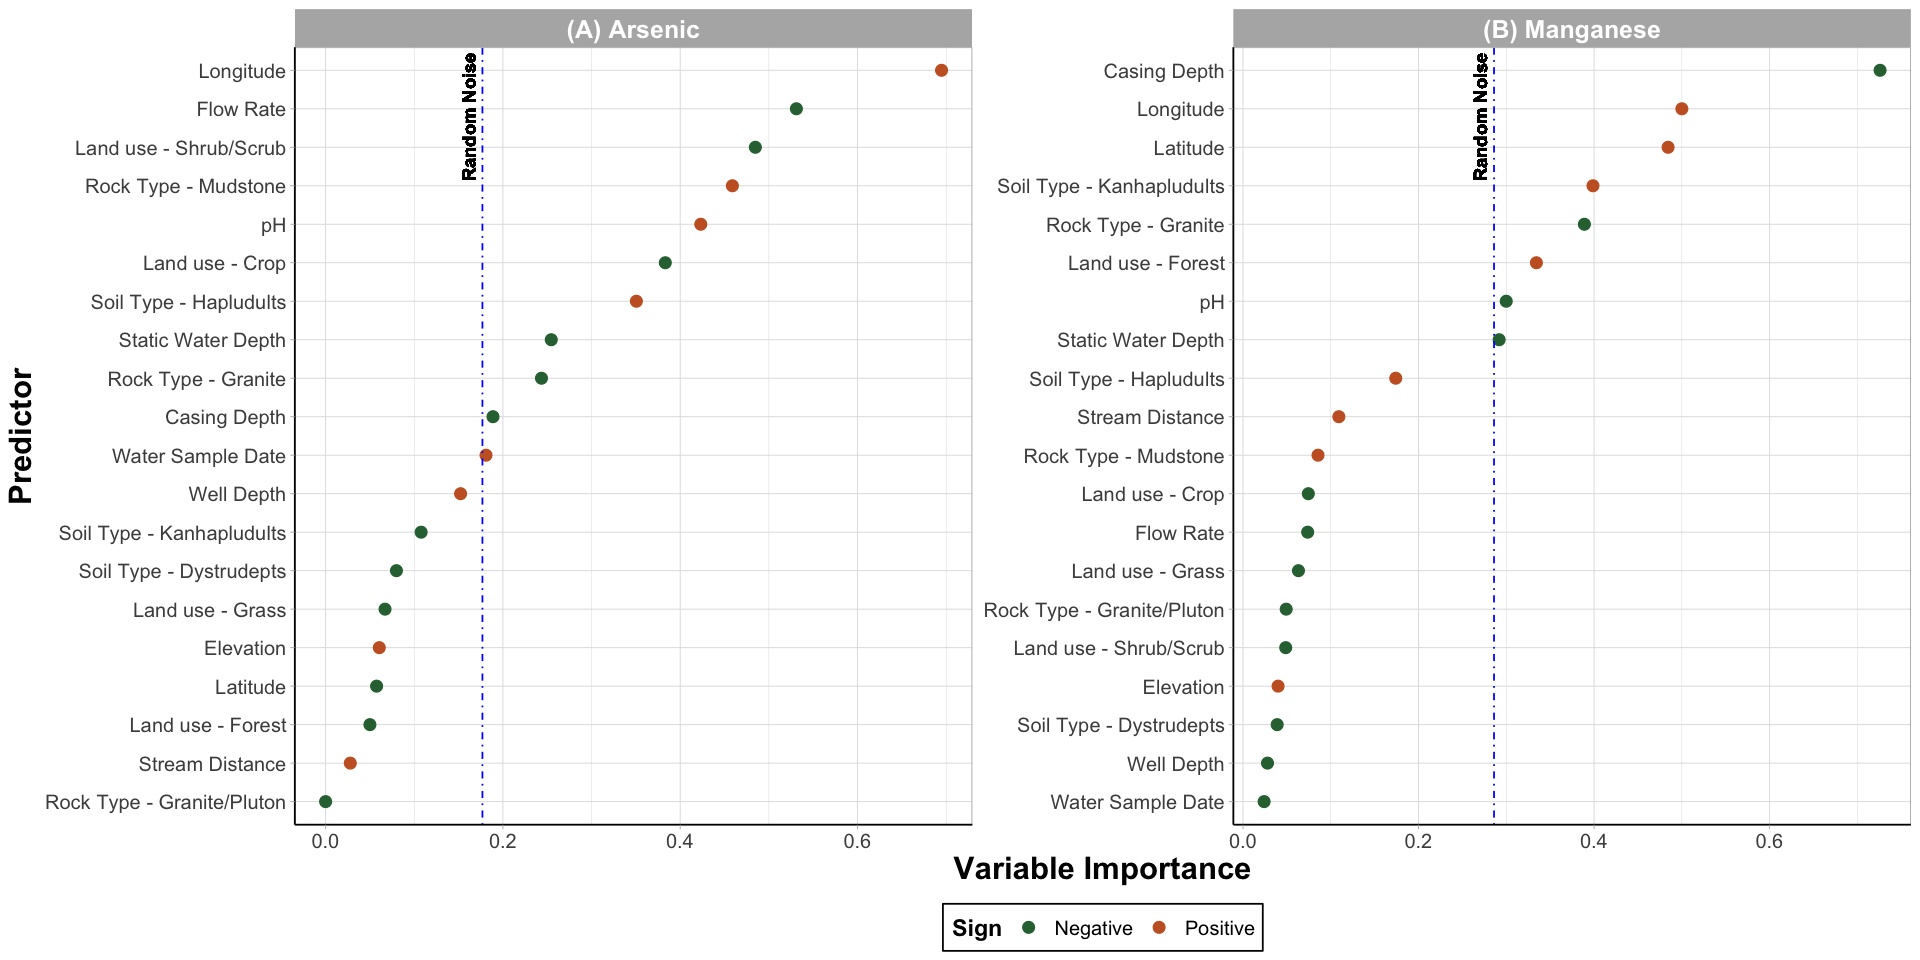

In [4]:
options(repr.plot.width=16, repr.plot.height=8) #changing size

Figure3 = ggplot(data = var_imp_df) + 
  geom_point(aes(x = abs(Variable.Importance), y = reorder_within(Predictor, abs(Variable.Importance), Outcome),
                color = Sign), size = 3) + 

  geom_vline(aes(xintercept = Random_Noise + 0.02), color = "blue", linetype = "dotdash") + 

  #adding text to verticle background noise lines
  geom_text(aes(x = Random_Noise + 0.02, label = "Random Noise\n", y = 18.8), angle = 90, fontface = "bold") +

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Outcome, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", 
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance', y = 'Predictor') + #changing axis labels 
  
  #removing size legend
  guides(size = "none") + 

  scale_color_manual(values = c("#2E6F40", "#C7622B"))

Figure3

In [5]:
# exporting figure
ggsave(Figure3, 
       filename = 'Figure3.pdf',
       path = Output,
       width = 16, height = 8)